# État de Bell - Intrication

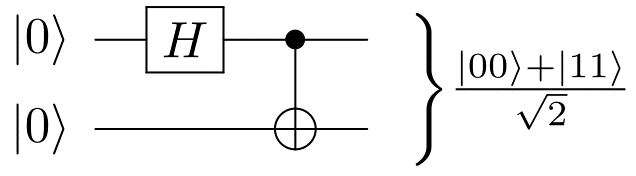

In [1]:
import Pkg

In [2]:
Pkg.add(url="https://github.com/anyonlabs/Snowflake.jl", rev="5f40e170aa152af17075803e633452484819efc4")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
    Updating `~/.julia/environments/v1.8/Project.toml`
  [7bd9edc1] ~ Snowflake v0.1.0 `https://github.com/anyonlabs/Snowflake.jl#main` ⇒ v0.1.0 `https://github.com/anyonlabs/Snowflake.jl#5f40e17`
    Updating `~/.julia/environments/v1.8/Manifest.toml`
  [7bd9edc1] ~ Snowflake v0.1.0 `https://github.com/anyonlabs/Snowflake.jl#main` ⇒ v0.1.0 `https://github.com/anyonlabs/Snowflake.jl#5f40e17`
  [aaca4a50] + gRPCClient v0.1.4
Precompiling project...
  ✓ Snowflake
  1 dependency successfully precompiled in 14 seconds. 175 already precompiled.


In [2]:
using Snowflake

In [3]:
c = QuantumCircuit(qubit_count = 2, bit_count = 0)

Quantum Circuit Object:
   id: 9b611d5c-c728-11ed-1583-f34891c892c3 
   qubit_count: 2 
   bit_count: 0 
q[1]:
     
q[2]:
     



In [4]:
push_gate!(c, hadamard(1))

Quantum Circuit Object:
   id: 9b611d5c-c728-11ed-1583-f34891c892c3 
   qubit_count: 2 
   bit_count: 0 
q[1]:──H──
          
q[2]:─────
          



In [5]:
push_gate!(c, control_x(1, 2))

Quantum Circuit Object:
   id: 9b611d5c-c728-11ed-1583-f34891c892c3 
   qubit_count: 2 
   bit_count: 0 
q[1]:──H────*──
            |  
q[2]:───────X──
               



In [ ]:
\Psi

**NOTE:** The greek letter Psi below is obtained by using \Psi [tab key]. All Julia unicode input is listed at __[Julia Unicode](https://docs.julialang.org/en/v1/manual/unicode-input/)__

In [7]:
ψ = simulate(c)

4-element Ket{ComplexF64}:
0.7071067811865475 + 0.0im
0.0 + 0.0im
0.0 + 0.0im
0.7071067811865475 + 0.0im


In [8]:
get_measurement_probabilities(c)

4-element Vector{Float64}:
 0.4999999999999999
 0.0
 0.0
 0.4999999999999999

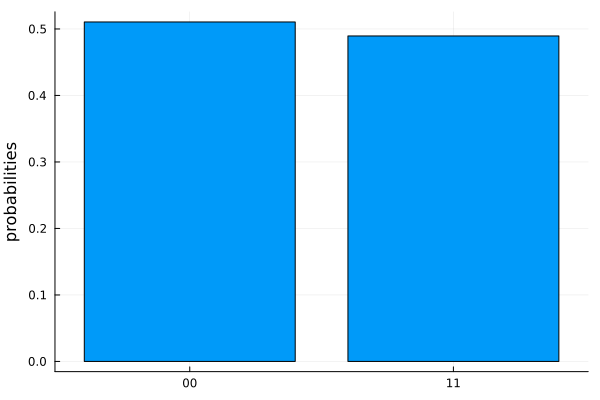

In [9]:
plot_histogram(c,1001)

In [10]:
?push_gate!

search: push_gate!



```
push_gate!(circuit::QuantumCircuit, gate::Gate)
push_gate!(circuit::QuantumCircuit, gates::Array{Gate})
```

Pushes a single gate or an array of gates to the `circuit` pipeline. This function is mutable. 

# Examples

```jldoctest
julia> c = Snowflake.QuantumCircuit(qubit_count = 2, bit_count = 0);

julia> push_gate!(c, [hadamard(1),sigma_x(2)])
Quantum Circuit Object:
   id: 57cf5de2-7ba7-11ec-0e10-05c6faaf91e9 
   qubit_count: 2 
   bit_count: 0 
q[1]:──H──
          
q[2]:──X──
          


julia> push_gate!(c, control_x(1,2))
Quantum Circuit Object:
   id: 57cf5de2-7ba7-11ec-0e10-05c6faaf91e9 
   qubit_count: 2 
   bit_count: 0 
q[1]:──H────*──
            |  
q[2]:──X────X──
```


In [11]:
?kron

search: kron kron! KeyError StackOverflowError UndefKeywordError



```
kron(A, B)
```

Kronecker tensor product of two vectors or two matrices.

For real vectors `v` and `w`, the Kronecker product is related to the outer product by `kron(v,w) == vec(w * transpose(v))` or `w * transpose(v) == reshape(kron(v,w), (length(w), length(v)))`. Note how the ordering of `v` and `w` differs on the left and right of these expressions (due to column-major storage). For complex vectors, the outer product `w * v'` also differs by conjugation of `v`.

# Examples

```jldoctest
julia> A = [1 2; 3 4]
2×2 Matrix{Int64}:
 1  2
 3  4

julia> B = [im 1; 1 -im]
2×2 Matrix{Complex{Int64}}:
 0+1im  1+0im
 1+0im  0-1im

julia> kron(A, B)
4×4 Matrix{Complex{Int64}}:
 0+1im  1+0im  0+2im  2+0im
 1+0im  0-1im  2+0im  0-2im
 0+3im  3+0im  0+4im  4+0im
 3+0im  0-3im  4+0im  0-4im

julia> v = [1, 2]; w = [3, 4, 5];

julia> w*transpose(v)
3×2 Matrix{Int64}:
 3   6
 4   8
 5  10

julia> reshape(kron(v,w), (length(w), length(v)))
3×2 Matrix{Int64}:
 3   6
 4   8
 5  10
```

---

```
kron(x, y)
```

Compute the Kronecker product of two [`Kets`](@ref Ket) or two [`Operators`](@ref Operator). More details about the Kronecker product can be found [here](https://en.wikipedia.org/wiki/Kronecker_product). 

# Examples

```jldoctest
julia> ψ_0 = Ket([0.0; 1.0])
2-element Ket{ComplexF64}:
0.0 + 0.0im
1.0 + 0.0im


julia> ψ_1 = Ket([1.0; 0.0])
2-element Ket{ComplexF64}:
1.0 + 0.0im
0.0 + 0.0im


julia> ψ_0_1 = kron(ψ_0, ψ_1)
4-element Ket{ComplexF64}:
0.0 + 0.0im
0.0 + 0.0im
1.0 + 0.0im
0.0 + 0.0im


julia> kron(sigma_x(), sigma_y())
(4, 4)-element Snowflake.Operator:
Underlying data Matrix{ComplexF64}:
0.0 + 0.0im    0.0 + 0.0im    0.0 + 0.0im    0.0 - 1.0im
0.0 + 0.0im    0.0 + 0.0im    0.0 + 1.0im    0.0 + 0.0im
0.0 + 0.0im    0.0 - 1.0im    0.0 + 0.0im    0.0 + 0.0im
0.0 + 1.0im    0.0 + 0.0im    0.0 + 0.0im    0.0 + 0.0im
```


In [12]:
push_gate!(c, [hadamard(1), hadamard(2)])

Quantum Circuit Object:
   id: 9b611d5c-c728-11ed-1583-f34891c892c3 
   qubit_count: 2 
   bit_count: 0 
q[1]:──H────*────H──
            |       
q[2]:───────X────H──
                    



In [13]:
simulate(c)

4-element Ket{ComplexF64}:
0.7071067811865474 + 0.0im
0.0 + 0.0im
0.0 + 0.0im
0.7071067811865474 + 0.0im


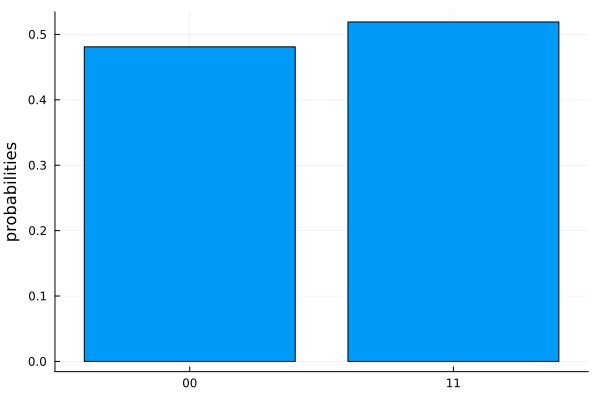

KeyError: KeyError: key "debug_request" not found

KeyError: KeyError: key "debug_request" not found

KeyError: KeyError: key "debug_request" not found

KeyError: KeyError: key "debug_request" not found

KeyError: KeyError: key "debug_request" not found

KeyError: KeyError: key "debug_request" not found

KeyError: KeyError: key "debug_request" not found

KeyError: KeyError: key "debug_request" not found

KeyError: KeyError: key "debug_request" not found

In [14]:
plot_histogram(c,1000)

In [ ]:
6